<a href="https://colab.research.google.com/github/JungAh12/Everyone_TF2.0/blob/master/custom_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow-gpu==2.0.0-rc1

     |████████████████████████████████| 380.5MB 39kB/s 
     |████████████████████████████████| 4.3MB 34.6MB/s 
     |████████████████████████████████| 501kB 61.0MB/s 


In [0]:
import tensorflow as tf

#변수 Variable
Tensor는 상태가 없고 변경이 불가능한 객체이다.

그러나 머신러닝 모델은 가중치 값이 손실이 낮은 값으로 업데이트 되어야 한다.

In [28]:
x = tf.zeros([10, 10])  #10x10 zero tensor 생성
x += 2  #broadcast
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


위는 파이썬을 통해서 값을 변경했다.

텐서플로우 변수를 사용하는 것이 더 효율적이고 편하다.

In [0]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

# 값을 재배열한다.
v.assign(3.0)
assert v.numpy() == 3.0

#tf.square()와 같은 텐서플로 연산에 'v'를 사용하고 재할당한다.
v.assign(tf.square(v))
assert v.numpy() == 9.0

variable을 사용한 연산은 gradient 계산에서 자동적으로 추가된다.
embedding을 사용하는 경우 saprse tensor를 사용해서 업데이트된다.
이는 연산과 메모리에 더욱 효율적이다.


In [0]:
#model 생성
class Model(object):
    def __init__(self):
        self.W = tf.Variable(5.0)   #trainable variable
        self.b = tf.Variable(0.0)   #trainable variable
    def __call__(self, x):
        return self.W*x+self.b      #fully connected
    
model = Model()
assert model(3.0).numpy() == 15.0

loss 정의

In [0]:
#MSE : mean sqaure error
def loss(predicted_y, desired_y) :
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

학습 데이터 가져오기

In [0]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise  # 정답 값

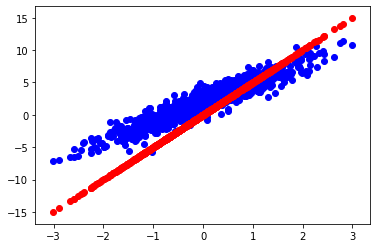

cur loss : 
8.934707


In [47]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('cur loss : ')
print(loss(model(inputs), outputs).numpy())

#훈련 루프 정의

In [0]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        cur_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(cur_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)  #assign_sub : variable에 저장되어있는 값을 조작하는 연산자 sub은 뺄셈. W -= learning_rate*dW
    model.b.assign_sub(learning_rate * db)

epoch  0: W=5.00 b=0.00, loss=8.93471
epoch  1: W=4.62 b=0.40, loss=6.17827
epoch  2: W=4.31 b=0.72, loss=4.38440
epoch  3: W=4.06 b=0.98, loss=3.21683
epoch  4: W=3.86 b=1.19, loss=2.45681
epoch  5: W=3.70 b=1.36, loss=1.96202
epoch  6: W=3.56 b=1.49, loss=1.63986
epoch  7: W=3.45 b=1.60, loss=1.43009
epoch  8: W=3.37 b=1.68, loss=1.29347
epoch  9: W=3.29 b=1.75, loss=1.20449


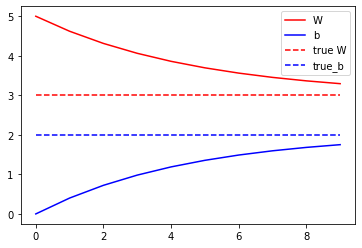

In [49]:
model = Model() #model 생성

Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    cur_loss = loss(model(inputs), outputs) #현재 loss

    train(model, inputs, outputs, learning_rate=0.1)
    print('epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f'%(epoch, Ws[-1], bs[-1], cur_loss))

plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W]*len(epochs),'r--',
         [TRUE_b]*len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()